Tick data preparation  |  order book A7897jj56

In [2]:
!gdown 10Iz_QBcacDwOsuZXK6BCAEhVNt7XPXoq

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10Iz_QBcacDwOsuZXK6BCAEhVNt7XPXoq
To: /content/TickData_A7897jj56.csv
100% 37.3M/37.3M [00:00<00:00, 72.2MB/s]


In [ ]:
import numpy as np
import pandas as pd
import datetime
import random


def tickdata_prep(instrument_id):
    input_data = pd.read_csv('/content/TickData_A7897jj56.csv', sep=';')

    tickdata = input_data[input_data.SecurityID == instrument_id]

    #tickdata.date = tickdata.date.astype('')

    tickdata.SecurityID = tickdata.SecurityID.astype('int64')

    tickdata['MDEntryTime2'] = pd.to_datetime(tickdata.date + ' ' + tickdata.MDEntryTime, format="%d.%m.%y %H:%M:%S.%f")
    tickdata.MDEntryTime = tickdata['MDEntryTime2'].apply(lambda x: x.value if ~pd.isnull(x) else np.nan)


    tickdata.MsgSeqNum = tickdata.MsgSeqNum.astype('int64')

    tickdata.SenderCompID = tickdata.SenderCompID.astype('int64')

    tickdata.MarketSegmentID = tickdata.MarketSegmentID.astype('int64')

    tickdata.MDUpdateAction = tickdata.MDUpdateAction.astype('int8')

    tickdata.MDEntryPx = tickdata.MDEntryPx.astype('float64')

    tickdata.MDEntrySize = tickdata.MDEntrySize.astype('int64')

    #tickdata.TrdType = tickdata.TrdType.fillna(0).astype('int64') # outside auction -> 0

    tickdata.TradeCondition = tickdata.TradeCondition.astype('int64')

    tickdata['AggressorTimestamp2'] = pd.to_datetime(tickdata.date + ' ' + tickdata.AggressorTimestamp, format="%d.%m.%y %H:%M:%S.%f")
    tickdata.AggressorTimestamp = tickdata['AggressorTimestamp2'].apply(lambda x: x.value if ~pd.isnull(x) else np.nan)

    tickdata['RequestTime2'] =  pd.to_datetime(tickdata.date + ' ' + tickdata.RequestTime, format="%d.%m.%y %H:%M:%S.%f")
    tickdata.RequestTime = tickdata['RequestTime2'].apply(lambda x: x.value if ~pd.isnull(x) else np.nan)

    #tickdata.AggressorSide = tickdata.AggressorSide.fillna(0).astype('int8') # N/A -> 0

    #tickdata.NumberOfBuyOrders = tickdata.NumberOfBuyOrders.astype('int64')

    #tickdata.NumberOfSellOrders = tickdata.NumberOfSellOrders.astype('int64')

    #tickdata.RestingCxlQty = tickdata.RestingCxlQty.fillna(0).astype('int64')

    tickdata.MDEntryID = tickdata.MDEntryID.astype('int64')


    tickdata = tickdata.drop(['MDEntryTime2', 'AggressorTimestamp2', 'RequestTime2'], axis=1)

    tickdata.to_csv('TickDataDerivativesTrades3.csv', sep=';', encoding='utf-8')


instrument_id = 1416211
#tickdata_prep(instrument_id)

tickdata = pd.read_csv('TickDataDerivativesTrades3.csv', sep=';')

#tickdata.head(20)
tickdata.info()

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import tensorflow as tf
import random
#plt.rcParams['figure.figsize'] = [20, 10]

def tickdata_prep(instrument_id):
    input_data = pd.read_csv('/content/TickData_A7897jj56.csv', sep=';')
                       #usecols=['date', 'SecurityID', 'MDEntryTime'],
                       #dtype={'date':str, 'MDEntryTime':str, #'MDUpdateAction':pd.Int8, 'TrdType':pd.Int64,
                              #'AggressorSide':pd.Int8,
                        #      'AggressorTimestamp':str, 'RequestTime':str})
    tickdata = input_data[input_data.SecurityID == instrument_id]

    tickdata.MDEntryTime =        pd.to_datetime(tickdata.date + ' ' + tickdata.MDEntryTime, format="%d.%m.%y %H:%M:%S.%f")
    tickdata.AggressorTimestamp = pd.to_datetime(tickdata.date + ' ' + tickdata.AggressorTimestamp, format="%d.%m.%y %H:%M:%S.%f")
    tickdata.RequestTime =        pd.to_datetime(tickdata.date + ' ' + tickdata.RequestTime, format="%d.%m.%y %H:%M:%S.%f")

    tickdata = tickdata.drop(['date', 'SecurityID'], axis=1)

    tickdata.MDUpdateAction = tickdata.MDUpdateAction.astype('int8')
    tickdata.TrdType = tickdata.TrdType.fillna(0).astype('int64') # outside auction -> 0
    tickdata.AggressorSide = tickdata.AggressorSide.fillna(0).astype('int8') # N/A -> 0
    #tickdata.NumberOfBuyOrders = tickdata.NumberOfBuyOrders.astype('int64')
    #tickdata.NumberOfSellOrders = tickdata.NumberOfSellOrders.astype('int64')
    tickdata.RestingCxlQty = tickdata.RestingCxlQty.fillna(0).astype('int64')
    tickdata.MDEntryID = tickdata.MDEntryID.astype('int64')

    #tickdata.set_index(['MDEntryTime','MDEntryID'], inplace=True)
    #tickdata.set_index('MDEntryTime', inplace=True)

    tickdata.to_hdf('tickdata_' + str(instrument_id) + '.h5', key='td', mode='w')
    tickdata.to_csv('TickData_A7897jj56-4.csv', sep=';', encoding='utf-8')

instrument_id = 1416211
tickdata_prep(instrument_id)
# negative if sell
tickdata = pd.read_hdf('tickdata_' + str(instrument_id) + '.h5')
#tickdata.MDEntryTime = tickdata.MDEntryTime.dt.tz_localize('UTC')
#tickdata.index[tickdata.MDEntrySize > 100]

#tickdata.groupby('MDEntryTime').groups.keys()
#plt.plot(tickdata.MDEntryTime, tickdata.MDEntrySize)

#tickdata.index[tickdata.RestingCxlQty == ' ']
#tickdata.head(20)
#tickdata.loc['2016-04-29 19:59:51.901441']

#tickdata.head(10)
#tickdata.info(memory_usage='deep')

#tickdata[['SenderCompID','MDEntryPx']]
#fig, ax = plt.subplots(figsize=(20,10))
#tickdata.MDEntryPx.plot(ax=ax)
#tickdata.xs('MDEntryTime').plot(ax=ax, subplots=True)
#tickdata.index



/tmp/ipython-input-2227603066.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickdata.MDEntryTime =        pd.to_datetime(tickdata.date + ' ' + tickdata.MDEntryTime, format="%d.%m.%y %H:%M:%S.%f")
/tmp/ipython-input-2227603066.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickdata.AggressorTimestamp = pd.to_datetime(tickdata.date + ' ' + tickdata.AggressorTimestamp, format="%d.%m.%y %H:%M:%S.%f")
/tmp/ipython-input-2227603066.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [4]:
tickdata.head(10)

,MDEntryTime,MsgSeqNum,SenderCompID,MarketSegmentID,MDUpdateAction,MDEntryPx,MDEntrySize,TrdType,TradeCondition,AggressorTimestamp,RequestTime,AggressorSide,NumberOfBuyOrders,NumberOfSellOrders,RestingCxlQty,MDEntryID
0,2016-04-25 06:00:03.744669528,222,72,589,0,10398.0,94,1100,47,NaT,NaT,0,44.0,32.0,0,1
1,2016-04-25 06:00:03.745322942,226,72,589,0,10398.0,1,0,1,NaT,NaT,2,1.0,1.0,0,2
2,2016-04-25 06:00:03.745404713,227,72,589,0,10398.0,1,0,1,NaT,NaT,2,1.0,1.0,0,3
3,2016-04-25 06:00:03.745447273,228,72,589,0,10398.0,1,0,1,NaT,NaT,2,1.0,1.0,0,4
4,2016-04-25 06:00:03.745482299,229,72,589,0,10398.0,1,0,1,NaT,NaT,2,1.0,1.0,0,5
5,2016-04-25 06:00:03.745518895,230,72,589,0,10398.0,1,0,1,NaT,NaT,2,1.0,1.0,0,6
6,2016-04-25 06:00:03.746014093,231,72,589,0,10400.0,1,0,5,2016-04-25 06:00:03.745998228,2016-04-25 06:00:03.745901025,1,1.0,1.0,0,7
7,2016-04-25 06:00:03.773909322,282,72,589,0,10398.5,2,0,1,2016-04-25 06:00:03.773896012,2016-04-25 06:00:03.773829121,2,2.0,1.0,0,8
8,2016-04-25 06:00:03.774115687,284,72,589,0,10398.5,1,0,1,2016-04-25 06:00:03.774102566,2016-04-25 06:00:03.773995358,2,1.0,1.0,0,9
9,2016-04-25 06:00:03.774115687,284,72,589,0,10398.0,1,0,1,2016-04-25 06:00:03.774102566,2016-04-25 06:00:03.773995358,2,1.0,1.0,0,10


array([<Axes: >], dtype=object)

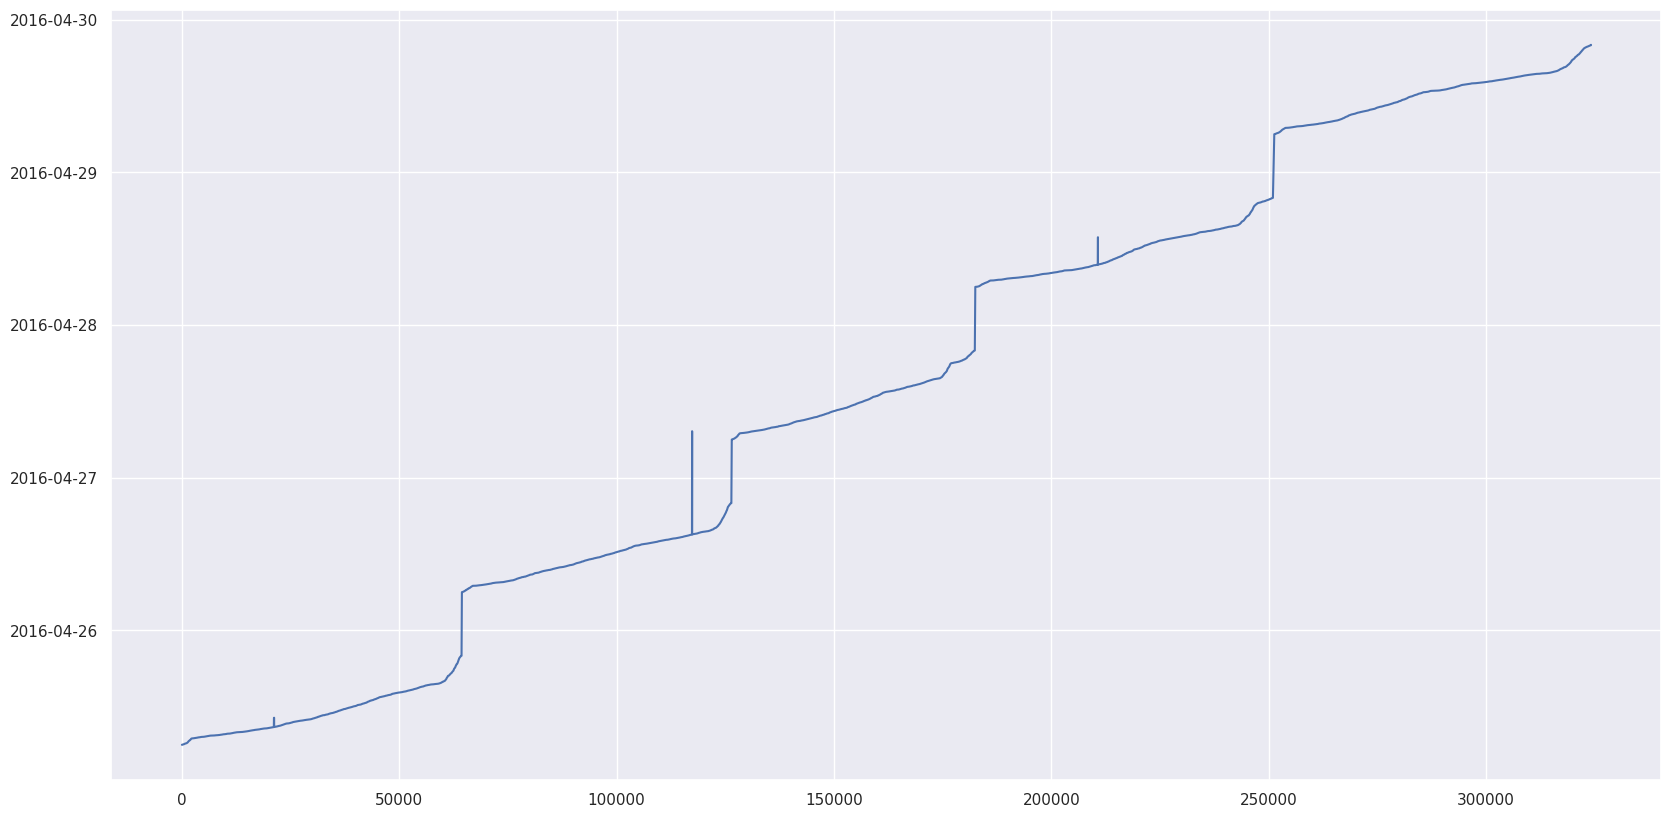

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
#tickdata.MDEntryPx.plot(ax=ax)
tickdata.MDEntryTime.plot(ax=ax, subplots=True)